In [72]:
import ktransit
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ktransit import FitTransit
import tqdm
%matplotlib inline

In [73]:
M1 = ktransit.LCModel()
M1.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M1.add_planet(
        T0=1.0,     # a transit mid-time  
        period=1.0, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=0.1,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

M1.add_planet() # you can add as many planets as you like (up to 10)

M1.add_data(
        time=np.arange(0,10,0.0188),                                 # timestamps to evaluate the model on
        itime=np.zeros_like(np.arange(0,10,0.0188))+0.0188 )      # integration time of each timestamp

tmod1 = M1.transitmodel # the out of transit data will be 0.0 unless you specify zpt


In [74]:
M2 = ktransit.LCModel()
M2.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M2.add_planet(
        T0=1.0,     # a transit mid-time  
        period=1.0, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=0.1,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

M2.add_planet() # you can add as many planets as you like (up to 10)

M2.add_data(
        time=np.arange(0,10,0.00138888888),                                 # timestamps to evaluate the model on
        itime=np.zeros_like(np.arange(0,10,0.00138888888))+0.00138888888 )      # integration time of each timestamp

tmod2 = M2.transitmodel # the out of transit data will be 0.0 unless you specify zpt


In [94]:
# do tmod1
tmod1_rprs = np.array([])
for i in tqdm.tqdm(range(500)):
    noise1 = np.random.normal(0,0.01,size=np.shape(tmod1)[0])
    flux = tmod1 + noise1
    ferr = np.zeros_like(tmod1) + 0.01

    fitT = FitTransit()
    fitT.add_guess_star(rho=1.5)    
    fitT.add_guess_planet(
            period=1.0, impact=0.1, 
            T0=1.0, rprs=0.1)
    fitT.add_data(time=M1.time, itime=M1.itime, flux=flux, ferr=ferr)

    vary_star = ['rho', 'zpt']      # free stellar parameters
    vary_planet = (['period',       # free planetary parameters
            'T0', #'impact', 
            'rprs'])                # free planet parameters are the same for every planet you model

    fitT.free_parameters(vary_star, vary_planet)
    fitT.do_fit()                   # run the fitting

#     fitT.print_results()            # print some results
    tmod1_rprs = np.r_[tmod1_rprs, fitT.fitresultplanets['pnum0']['rprs']]





100%|██████████| 500/500 [01:40<00:00,  5.18it/s]


In [95]:
# do tmod2
tmod2_rprs = np.array([])
for i in tqdm.tqdm(range(500)):
    noise2 = np.random.normal(0,0.01,size=np.shape(tmod2)[0])
    flux = tmod2 + noise2
    ferr = np.zeros_like(tmod2) + 0.01

    fitT = FitTransit()
    fitT.add_guess_star(rho=1.5)    
    fitT.add_guess_planet(
            period=1.0, impact=0.1, 
            T0=1.0, rprs=0.1)
    fitT.add_data(time=M2.time, itime=M2.itime, flux=flux, ferr=ferr)

    vary_star = ['rho', 'zpt']      # free stellar parameters
    vary_planet = (['period',       # free planetary parameters
            'T0', #'impact', 
            'rprs'])                # free planet parameters are the same for every planet you model

    fitT.free_parameters(vary_star, vary_planet)
    fitT.do_fit()                   # run the fitting

#     fitT.print_results()            # print some results
    tmod2_rprs = np.r_[tmod2_rprs, fitT.fitresultplanets['pnum0']['rprs']]





100%|██████████| 500/500 [1:32:48<00:00,  1.52s/it]      


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.,  89.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([ 0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,
         0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,
         0.23,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29]),
 <a list of 24 Patch objects>)

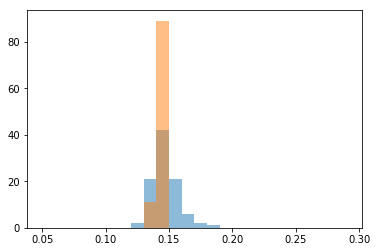

In [89]:

plt.hist(tmod1_rprs, np.arange(0.05,0.3,0.01), alpha=0.5)
plt.hist(tmod2_rprs, np.arange(0.05,0.3,0.01), alpha=0.5)

In [91]:
tmod2_rprs

array([ 0.14184097,  0.14256004,  0.14170077,  0.14113109,  0.14348296,
        0.14308532,  0.13956334,  0.14220058,  0.13952509,  0.14304962,
        0.14455591,  0.1439542 ,  0.14336854,  0.14194566,  0.13931181,
        0.13947495,  0.14121704,  0.14202582,  0.13979496,  0.14061202,
        0.14288942,  0.14205161,  0.14047327,  0.14025844,  0.14004196,
        0.14128868,  0.14444705,  0.14097759,  0.14297619,  0.14200862,
        0.14091885,  0.1439879 ,  0.14054063,  0.14260461,  0.14324676,
        0.1419955 ,  0.14202051,  0.14227647,  0.14129163,  0.14265768,
        0.14134572,  0.14597502,  0.14166562,  0.14529031,  0.14408095,
        0.14137663,  0.1411255 ,  0.14322476,  0.13941164,  0.14307697,
        0.1404312 ,  0.14030794,  0.14271004,  0.140607  ,  0.14061454,
        0.14119295,  0.1426872 ,  0.14078491,  0.13937793,  0.14194856,
        0.14066692,  0.140532  ,  0.14361276,  0.14057207,  0.14120987,
        0.13969543,  0.14103598,  0.14245732,  0.14507589,  0.14

In [93]:
fitT.print_results()

Best-fitting stellar parameters
rho: 1.4862897975245501
zpt: 3.134776250313567e-05

Best-fitting planet parameters for planet 0
period: 0.9999182308463961
T0: 1.0008168365012158
impact: 0.11822533694554958
rprs: 0.13702723394457914

